# Quantificação de usos por períodos

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# Padrões de nomenclatura de usos

usos = {
    "apartamento em condomínio":"apartamento",
    "cortiço (habitação coletiva subnormal)":"cortiço",
    "escritório/consultório em condomínio (unidade autônoma)":"escritório ou consultório",
    "loja em edifício em condomínio (unidade autônoma)":"loja em edifício em condomínio",
    "residência coletiva, exclusive cortiço (mais de uma residência no lote)":"residência coletiva (mais de uma residência no lote), exclusive cortiço",
    "posto de serviço (combustíveis)":"posto de serviço",
    "estacionamento e garagem, não em condomínio":"garagem (exclusive em prédio em condomínio)",
    "garagem (unidade autônoma) de prédio de garagens":"garagem, em prédio de garagens",
    "garagem (unidade autônoma) em edifício em condomínio de escritórios, consultórios ou misto":"garagem em edifício de escritórios, consultórios ou misto",
    "garagem (unidade autônoma) em edifício em condomínio de uso exclusivamente residencial":"garagem em edifício de uso exclusivamente residencial",
    "outras edificações de uso coletivo, com utilização múltipla":"outras edificações do tipo (uso coletivo), com utilização múltipla",
    "outras edificações de uso comercial, com utilização múltipla":"outras edificações do tipo (uso comércio), com utilização múltipla",
    "outras edificações de uso de serviço, com utilização múltipla":"outras edificações do tipo (uso serviço), com utilização múltipla",
    "outras edificações de uso especial, com utilização múltipla":"outras edificações do tipo (uso especial), com utilização múltipla",
    "prédio com uso exclusivamente residencial, não em condomínio":"prédio de apartamento, não em condomínio, de uso exclusivamente residencial",
    "prédio com uso misto, predominância de uso não residencial, não em condomínio":"prédio de escritório, não em condomínio, de uso misto (apartamentos e escritórios e/ou consultórios) com ou sem loja (predominância comercial)",
    "prédio com uso misto, predominância de uso residencial, não em condomínio":"prédio de apartamento, não em condomínio, de uso misto (apartamentos e escritórios e/ou consultórios), com ou sem loja (predominância residencial)",
    "prédio de escritório ou consultório, com ou sem lojas, não em condomínio":"prédio de escritório ou consultório, não em condomínio, com ou sem lojas",
    "flat de uso comercial (semelhante a hotel)":"flat, não residencial",
    "flat residencial em condomínio":"flat, residencial"
}

In [3]:
{v: k for k, v in usos.items()}

{'apartamento': 'apartamento em condomínio',
 'cortiço': 'cortiço (habitação coletiva subnormal)',
 'escritório ou consultório': 'escritório/consultório em condomínio (unidade autônoma)',
 'loja em edifício em condomínio': 'loja em edifício em condomínio (unidade autônoma)',
 'residência coletiva (mais de uma residência no lote), exclusive cortiço': 'residência coletiva, exclusive cortiço (mais de uma residência no lote)',
 'posto de serviço': 'posto de serviço (combustíveis)',
 'garagem (exclusive em prédio em condomínio)': 'estacionamento e garagem, não em condomínio',
 'garagem, em prédio de garagens': 'garagem (unidade autônoma) de prédio de garagens',
 'garagem em edifício de escritórios, consultórios ou misto': 'garagem (unidade autônoma) em edifício em condomínio de escritórios, consultórios ou misto',
 'garagem em edifício de uso exclusivamente residencial': 'garagem (unidade autônoma) em edifício em condomínio de uso exclusivamente residencial',
 'outras edificações do tipo (u

In [4]:
list(usos.values())

['apartamento',
 'cortiço',
 'escritório ou consultório',
 'loja em edifício em condomínio',
 'residência coletiva (mais de uma residência no lote), exclusive cortiço',
 'posto de serviço',
 'garagem (exclusive em prédio em condomínio)',
 'garagem, em prédio de garagens',
 'garagem em edifício de escritórios, consultórios ou misto',
 'garagem em edifício de uso exclusivamente residencial',
 'outras edificações do tipo (uso coletivo), com utilização múltipla',
 'outras edificações do tipo (uso comércio), com utilização múltipla',
 'outras edificações do tipo (uso serviço), com utilização múltipla',
 'outras edificações do tipo (uso especial), com utilização múltipla',
 'prédio de apartamento, não em condomínio, de uso exclusivamente residencial',
 'prédio de escritório, não em condomínio, de uso misto (apartamentos e escritórios e/ou consultórios) com ou sem loja (predominância comercial)',
 'prédio de apartamento, não em condomínio, de uso misto (apartamentos e escritórios e/ou consult

In [5]:
super_usos = {
    'residencial': ['apartamento', 
                    'cortiço', 
                    'residência coletiva (mais de uma residência no lote), exclusive cortiço'],
    'comercial': ['loja em edifício em condomínio'],
    'servicos': ['escritório ou consultório',
                'posto de serviço'],
    'garagem': ['garagem (exclusive em prédio em condomínio)',
               'garagem, em prédio de garagens',
               'garagem em edifício de escritórios, consultórios ou misto',
               'garagem em edifício de uso exclusivamente residencial']
}

In [6]:
# {v: k for k, v in super_usos.items()}

In [7]:
df_iptu = pd.read_csv('IPTU/IPTU_2020.zip',\
             compression='zip',\
             encoding='iso-8859-9',\
             sep=';',\
             decimal=',',\
             error_bad_lines=False)

In [22]:
# Obter o SQ (Setor e Quadra)
df_iptu['setor'] = df_iptu['NUMERO DO CONTRIBUINTE'].str[0:3]
df_iptu['quadra'] = df_iptu['NUMERO DO CONTRIBUINTE'].str[3:6]

# Normalizando o lote condominial
df_iptu.loc[df_iptu['NUMERO DO CONDOMINIO'].str[0:2] != '00', 'lote'] = '0000'
df_iptu.loc[df_iptu['NUMERO DO CONDOMINIO'].str[0:2] == '00', 'lote'] = \
df_iptu.loc[df_iptu['NUMERO DO CONDOMINIO'].str[0:2] == '00', 'NUMERO DO CONTRIBUINTE'].str[6:10]

# Individualizando a testada e pavimentos por lote (SQLC)
df_iptu['sqlc'] = df_iptu['setor'] + \
df_iptu['quadra'] + df_iptu['lote'] + \
df_iptu['NUMERO DO CONDOMINIO'].str[0:2]

df_iptu['AREA CONSTRUIDA'] = pd.to_numeric(df_iptu['AREA CONSTRUIDA'], errors ='coerce')
df_iptu['AREA OCUPADA'] = pd.to_numeric(df_iptu['AREA OCUPADA'], errors ='coerce')
df_iptu['AREA DO TERRENO'] = pd.to_numeric(df_iptu['AREA DO TERRENO'], errors ='coerce')
df_iptu['FRACAO IDEAL'] = pd.to_numeric(df_iptu['FRACAO IDEAL'], errors ='coerce')
df_iptu['QUANTIDADE DE PAVIMENTOS'] = pd.to_numeric(df_iptu['QUANTIDADE DE PAVIMENTOS'], errors ='coerce')
df_iptu['TESTADA PARA CALCULO'] = pd.to_numeric(df_iptu['TESTADA PARA CALCULO'], errors ='coerce')

# Adequando variáveis à fração ideal
df_iptu['area_terreno'] = df_iptu['FRACAO IDEAL'] * df_iptu['AREA DO TERRENO']
df_iptu['area_ocupada'] = df_iptu['FRACAO IDEAL'] * df_iptu['AREA OCUPADA']

# Adequar os usos ao padrão estabelecido
df_iptu.loc[df_iptu['TIPO DE USO DO IMOVEL']\
            .isin(usos),\
            'TIPO DE USO DO IMOVEL'] = \
df_iptu[df_iptu['TIPO DE USO DO IMOVEL']\
             .isin(usos)]['TIPO DE USO DO IMOVEL']\
.apply(lambda x: usos[x])

In [9]:
df_iptu['TIPO DE USO DO IMOVEL'].value_counts()

Apartamento em condomínio                                                                                                                             1363685
Residência                                                                                                                                            1081450
Residência coletiva, exclusive cortiço (mais de uma residência no lote)                                                                                203816
Garagem (unidade autônoma) em edifício em condomínio de uso exclusivamente residencial                                                                 196802
Escritório/consultório em condomínio (unidade autônoma)                                                                                                138156
Terreno                                                                                                                                                109885
Residência e outro uso (predominância residencial)  

In [29]:
df_iptu['ano_construcao'] = df_iptu['ANO DA CONSTRUCAO CORRIGIDO']

In [32]:
df_iptu.loc[df_iptu.ano_construcao < 1995, 
           'ano_construcao'] = 1994

In [43]:
df_iptu_tipo_ano_construcao = \
df_iptu.loc[:, ['TIPO DE USO DO IMOVEL', 
                'ano_construcao',
                'AREA CONSTRUIDA']]\
.groupby(['TIPO DE USO DO IMOVEL', 'ano_construcao'])\
.sum('AREA CONSTRUIDA')\
.reset_index()

In [144]:
df_iptu_metros_construidos_por_ano_e_uso = \
pd.crosstab(df_iptu_tipo_ano_construcao['TIPO DE USO DO IMOVEL'],
            df_iptu_tipo_ano_construcao.ano_construcao,
            values = df_iptu_tipo_ano_construcao['AREA CONSTRUIDA'],
            aggfunc = 'sum')

In [145]:
df_iptu_metros_construidos_por_ano_e_uso\
.to_csv('resultados/IPTU-metros-construidos-por-ano-e-uso.csv')

In [146]:
df_iptu_metros_construidos_por_ano_e_uso = pd.read_csv('resultados/IPTU-metros-construidos-por-ano-e-uso.csv')

In [147]:
df_iptu_metros_construidos_por_ano_e_uso = \
df_iptu_metros_construidos_por_ano_e_uso.drop('1994', axis=1)

In [148]:
df_iptu_metros_construidos_por_ano_e_uso

,TIPO DE USO DO IMOVEL,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Apartamento em condomínio,3406655.0,4461523.0,2932535.0,3573988.0,3805621.0,4053881.0,2784550.0,3430321.0,3701920.0,...,5974489.0,6637199.0,5360642.0,5644671.0,4988387.0,4547325.0,4255846.0,3397902.0,2205724.0,216191.0
1,Armazéns gerais e depósitos,152136.0,177012.0,163329.0,181803.0,127366.0,148521.0,250169.0,340145.0,149693.0,...,170342.0,207156.0,83810.0,73133.0,58512.0,78724.0,28530.0,52213.0,36171.0,12947.0
2,"Asilo, orfanato, creche, seminário ou convento",14523.0,25265.0,11957.0,17029.0,13065.0,13939.0,6790.0,13745.0,7098.0,...,11164.0,35560.0,12568.0,5591.0,11816.0,16676.0,29439.0,17416.0,18515.0,3068.0
3,"Cinema, teatro, casa de diversão, clube ou con...",12732.0,4378.0,11373.0,19868.0,19382.0,52648.0,6901.0,26528.0,27507.0,...,5503.0,2688.0,2219.0,1465.0,1271.0,11157.0,5010.0,13373.0,NaN,NaN
4,Clube esportivo,58677.0,10063.0,7310.0,106595.0,9453.0,15948.0,83183.0,38267.0,6189.0,...,5688.0,10551.0,21040.0,3053.0,346333.0,24942.0,300.0,6136.0,2841.0,1837.0
5,Cortiço,1568.0,7960.0,9545.0,4558.0,59996.0,2989.0,79297.0,4081.0,5225.0,...,2933.0,430.0,1300.0,NaN,1204.0,661.0,NaN,NaN,NaN,NaN
6,Escola,119941.0,122540.0,432134.0,234651.0,160291.0,129578.0,138337.0,421311.0,187844.0,...,92527.0,64047.0,99888.0,128712.0,54734.0,74188.0,51715.0,39087.0,44453.0,6066.0
7,Escritório/consultório em condomínio (unidade ...,285918.0,431513.0,488483.0,504315.0,979485.0,895302.0,352592.0,682618.0,393894.0,...,454238.0,549854.0,1135507.0,1250267.0,1255498.0,1263696.0,583916.0,584152.0,150047.0,17377.0
8,"Estação radioemissora, de televisão ou empresa...",3013.0,3589.0,115.0,8938.0,12110.0,8555.0,13761.0,3311.0,4195.0,...,14514.0,602.0,3493.0,433.0,53.0,218.0,23.0,670.0,NaN,NaN
9,Flat de uso comercial (semelhante a hotel),22866.0,25030.0,13658.0,10173.0,128198.0,363540.0,202918.0,129281.0,302035.0,...,23546.0,NaN,NaN,12083.0,NaN,16106.0,26395.0,NaN,NaN,NaN


<AxesSubplot:>

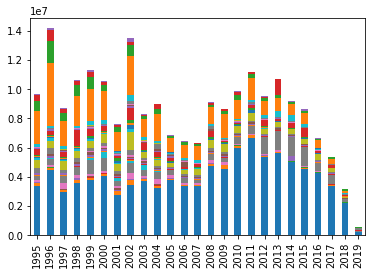

In [158]:
df_iptu_metros_construidos_por_ano_e_uso.\
set_index('TIPO DE USO DO IMOVEL').\
T.\
plot(kind='bar', stacked=True, legend=False)

<AxesSubplot:>

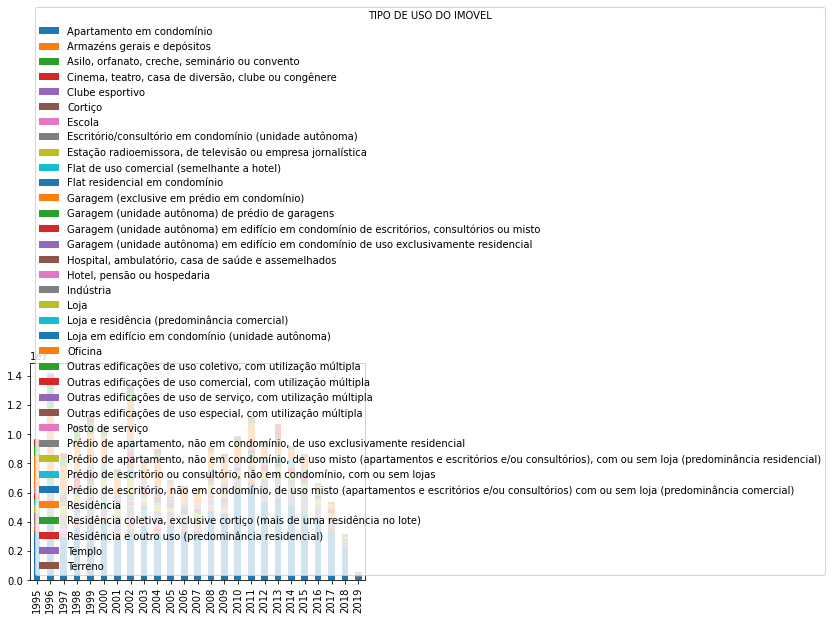

In [159]:
df_iptu_metros_construidos_por_ano_e_uso.\
set_index('TIPO DE USO DO IMOVEL').\
T.\
plot(kind='bar', stacked=True)

In [23]:
df_iptu.columns

Index(['NUMERO DO CONTRIBUINTE', 'ANO DO EXERCICIO', 'NUMERO DA NL',
       'DATA DO CADASTRAMENTO', 'TIPO DE CONTRIBUINTE 1',
       'CPF/CNPJ DO CONTRIBUINTE 1', 'NOME DO CONTRIBUINTE 1',
       'TIPO DE CONTRIBUINTE 2', 'CPF/CNPJ DO CONTRIBUINTE 2',
       'NOME DO CONTRIBUINTE 2', 'NUMERO DO CONDOMINIO', 'CODLOG DO IMOVEL',
       'NOME DE LOGRADOURO DO IMOVEL', 'NUMERO DO IMOVEL',
       'COMPLEMENTO DO IMOVEL', 'BAIRRO DO IMOVEL', 'REFERENCIA DO IMOVEL',
       'CEP DO IMOVEL', 'QUANTIDADE DE ESQUINAS/FRENTES', 'FRACAO IDEAL',
       'AREA DO TERRENO', 'AREA CONSTRUIDA', 'AREA OCUPADA',
       'VALOR DO M2 DO TERRENO', 'VALOR DO M2 DE CONSTRUCAO',
       'ANO DA CONSTRUCAO CORRIGIDO', 'QUANTIDADE DE PAVIMENTOS',
       'TESTADA PARA CALCULO', 'TIPO DE USO DO IMOVEL',
       'TIPO DE PADRAO DA CONSTRUCAO', 'TIPO DE TERRENO',
       'FATOR DE OBSOLESCENCIA', 'ANO DE INICIO DA VIDA DO CONTRIBUINTE',
       'MES DE INICIO DA VIDA DO CONTRIBUINTE', 'FASE DO CONTRIBUINTE',
       'seto

## Quantificando os lotes com uso misto

In [28]:
len(df_iptu['sqlc'].unique())

1661100

In [33]:
df_sqlc_usos = df_iptu.groupby('sqlc')['TIPO DE USO DO IMOVEL'].nunique()

In [66]:
len(df_sqlc_usos[df_sqlc_usos > 1])

11886

In [68]:
(len(df_sqlc_usos[df_sqlc_usos > 1]) / len(df_iptu['sqlc'].unique())) *100.

0.7155499367888748

In [53]:
df_iptu.loc[df_iptu.sqlc.isin(df_sqlc_usos[df_sqlc_usos > 1].index), 
            ['sqlc', 'ANO DA CONSTRUCAO CORRIGIDO']].\
groupby('ANO DA CONSTRUCAO CORRIGIDO').nunique().\
to_csv('resultados/IPTU-quantidade-uso-misto-por-ano.csv')

In [54]:
df_uso_misto_ano = pd.read_csv('resultados/IPTU-quantidade-uso-misto-por-ano.csv')

In [63]:
df_uso_misto_ano = df_uso_misto_ano.rename(columns ={'sqlc':'Novos Usos Mistos'})

<AxesSubplot:xlabel='ANO DA CONSTRUCAO CORRIGIDO'>

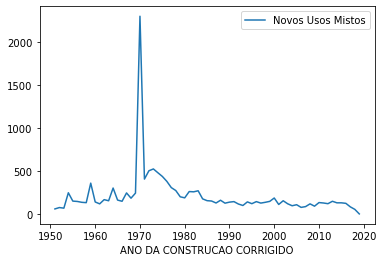

In [64]:
df_uso_misto_ano[df_uso_misto_ano['ANO DA CONSTRUCAO CORRIGIDO'] > 1950].\
set_index('ANO DA CONSTRUCAO CORRIGIDO').plot()

In [4]:
## TODO

# Rasters com 
# https://stackoverflow.com/questions/24978052/interpolation-over-regular-grid-in-python

# Krigagem com metragem construida Uso residencial/não residencial
# Krigagem com metragem construida Usos Residencial/Comercial/Servicos/Garagem

In [ ]:
## TODO 

# Classificação por diversas dimensões